In [149]:
from IPython.display import IFrame
from sklearn import datasets
import matplotlib
import pylab as pl
from itertools import cycle
from sklearn import naive_bayes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree

In [14]:
#1/Jeux de données :
#1.1/ Iris

In [15]:
irisData = datasets.load_iris()
print (irisData.data)
print (irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',width=300, height=200)

In [162]:
print(len(irisData.target))
#irisData.target.shape

150


In [18]:
# Target Names
print(irisData.data[31])
irisData.target_names

[5.4 3.4 1.5 0.4]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# Objective de cette methode est plot notre données en 2D classifier par chaque target (chacun on lui donne un couleur) et par rapport a deux attribues 
# ==> 2 axes dans ce cas l'attr 1 et 2

In [20]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 1], data[target == i, 2], c=c, label=label)
    pl.plot((2.5, 2.5,2.5,2.5,2.5), 'k-')
    pl.legend()
    pl.show()

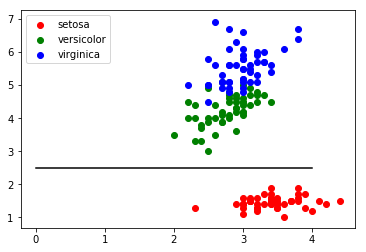

In [21]:
plot_2D(irisData.data,irisData.target,irisData.target_names)
# l'equation y=2.5 qlq soit x | sépare les exemples de la classe(setosa) des exemples des deux autres classes

In [22]:
#II- Un premier apprentissage de classiffieur
#l'objective de cet exemple est l'utilisation de la methode naive_bayes pour la classification et l'utilisation de 
# tous les éléments de l'échantillon 
# sauf le dernier pour l'apprentissage et on essai de predict le 32ème élément de l'échantillon

In [23]:
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage4
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1])
p31 = nb.predict(irisData.data[30:31])
print(p31)
plast = nb.predict(irisData.data[:-1])
print(plast)
p = nb.predict(irisData.data[:])
print(p)

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [25]:
#Ils sont pas cohérent 
#On doit augmenter la partie d’apprentissage 

#3/III- Evaluer les performances d'un classiffieur
#1. Performances sur l'ensemble d'apprentissage

In [29]:
#1.1 Le code suivant permet de compter les erreurs et ainsi de calculer l'erreur d'apprentissage
# Methode 1
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage4
irisData = datasets.load_iris()
nb.fit(irisData.data[:99], irisData.target[:99])
P = nb.predict(irisData.data[:])

ea = 0
Y = irisData.target
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
print(ea/len(irisData.data))

0.3333333333333333


In [38]:
# Methode 2
# compter les valeurs non null
T = P-Y
np.count_nonzero(T)/len(irisData.target)

0.3333333333333333

In [36]:
# Methode 3
# Accuracy a=1-e
nb.score(irisData.data,irisData.target)

0.6666666666666666

In [40]:
#Sur quelle(s) données (s) y a-t-il une erreur de prédiction ?
l = []
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
        l.append(i)
print(l)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


In [72]:
# 2 / Performances en généralisation
# 2.1. Estimer l'erreur réelle par division de l'échantillon d'apprentissage
# 2.1.a split  va deviser notre dataset en deux : une pour le test et l'autre pour le training S1 = 2/3 S , S2 = 1/3 S 
# P : pourcentage de l'echantillon dans ce cas 0.66
# S : iris dataset
def split(S,P) :
    # on permute les index aleatoirement et on fait le split
    m = len(S.data) 
    idx = np.random.permutation(m)  
    dataS1, dataS2 = S.data[idx[:round(P*m)],:], S.data[idx[round(P*m)+1:],:]
    targetS1, targetS2 = S.target[idx[:round(P*m)]], S.target[idx[round(P*m)+1:]]
    return [dataS1, targetS1, dataS2, targetS2]

print(split(irisData,0.66))
    

[array([[4.4, 3.2, 1.3, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [6.4, 3.1, 5.5, 1.8],
       [5.6, 3. , 4.5, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 2.8, 5.1, 2.4],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 4.9, 1.5],
       [4.9, 2.4, 3.3, 1. ],
       [7.3, 2.9, 6.3, 1.8],
       [5.1, 3.5, 1.4, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [6.2, 2.2, 4.5, 1.5],
       [4.6, 3.6, 1. , 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.7, 3.1, 4.4, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [5.7, 2.6, 3.5, 1. ],
       [5.4, 3.9, 1.7, 0.4],
       [6.4, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [6.7, 3.1, 5.6, 2.4],
       [5.7, 2.8, 4.1, 1.3],
       [7.2, 

In [137]:
# 2.1.b test methode pour tester l'accuracy de notre modele de classification 
# P : poucentage de l'echantillon ,
# cross : 1 si on utilise le ( cross validation ) et 0 si on utilise le random split et 2 si on utilise le Kfold 
# clf : le classificateur
# k : est un parametre optionnel si cross = 2 on utilise le kfold cross validation k represente le nbr de foldss
def test(S,clf,P,cross, nbr = 10) :
    if(cross == 0) :
        [dataS1, targetS1, dataS2, targetS2] = split(S,P)
    else :
        if(cross == 1) :        
            [dataS1, dataS2, targetS1, targetS2] = train_test_split( S.data, S.target, test_size=0.33) 
        else :
            somme = 0
            kf = KFold(n_splits=nbr)
            for train, test in kf.split(S.target):
                clf.fit(S.data[train], S.target[train])
                somme = somme + clf.score(S.data[test], S.target[test])
            return somme / nbr
    clf.fit(dataS1, targetS1)
    #print('The accuracy of the classifier on training data is {:.2f}'.format(clf.score(dataS1, targetS1)))
    #print('The accuracy of the classifier on test data is {:.2f}'.format(clf.score(dataS2, targetS2)))
    return clf.score(dataS2, targetS2)


In [112]:
#Testez cette fonction sur iris avec naive Bayes.
clf = naive_bayes.MultinomialNB(fit_prior=True)
test(irisData,clf,0.66,0)
# l'erreur est plus petit que la partie precedente 
# On obtient pas toujours la même estimation pour l'erreur réelle parceque notre individus de test change chaque fois

0.96

In [86]:
# 2.1.c repeter t fois les tests et on calcule la moyenne des erreurs
# t : nombre de fois quand on va repeter le test
# cross : 1 si on utilise le ( cross validation ) et 0 si on utilise le random split et 2 si on utilise le Kfold 
def moyErreur( t, S, clf, P, cross) : 
    moyErr = []
    n = 20
    for i in range(n):
        somme = 0
        for i in range(t):
            somme = somme + test(S,clf,P,cross)
        moyErr.append(somme / t)
    print(moyErr)

# vous pouvez tester avec n'importe qu'elle t = [10,50,100,1000]
moyErreur(10,irisData,clf,0.66,0)

[0.7959999999999999, 0.786, 0.77, 0.8400000000000001, 0.724, 0.8799999999999999, 0.726, 0.8400000000000001, 0.7939999999999999, 0.7799999999999999, 0.8139999999999998, 0.808, 0.8, 0.8160000000000001, 0.798, 0.8300000000000001, 0.7939999999999999, 0.7699999999999999, 0.732, 0.8]


In [87]:
moyErreur(100,irisData,clf,0.66,0)

[0.8189999999999994, 0.8111999999999999, 0.8034000000000002, 0.804, 0.7967999999999995, 0.8115999999999995, 0.7642000000000002, 0.7847999999999996, 0.7718, 0.7859999999999997, 0.8069999999999996, 0.7981999999999998, 0.7858000000000003, 0.8090000000000002, 0.7747999999999999, 0.8044000000000002, 0.8141999999999997, 0.7817999999999996, 0.8147999999999999, 0.8027999999999997]


In [88]:
moyErreur(1000,irisData,clf,0.66,0)

[0.8008200000000018, 0.8017200000000029, 0.7968400000000013, 0.7987600000000027, 0.8004200000000019, 0.8066600000000029, 0.7964800000000023, 0.7967000000000025, 0.7897800000000019, 0.7976200000000025, 0.7998600000000017, 0.7980800000000008, 0.800420000000002, 0.7972200000000005, 0.8049400000000015, 0.7945000000000008, 0.7970800000000028, 0.8002600000000024, 0.8056800000000026, 0.7957600000000026]


In [ ]:
# pour chaque t, l'erreur moyenne n'est pas réellement stable mais lorsque on fait agrandir t notre erreur moyenne converge 

In [ ]:
# 2.1.d on peut prend seulement 1/10 pour l'echantillon de test

In [79]:
moyErreur(10,irisData,clf,0.9,0)

[0.9857142857142858, 0.892857142857143, 0.8071428571428572, 0.9214285714285714, 0.8571428571428571, 0.8714285714285713, 0.85, 0.9214285714285714, 0.8428571428571429, 0.9428571428571428, 0.8142857142857143, 0.8571428571428573, 0.7, 0.9285714285714286, 0.8642857142857144, 0.9142857142857143, 0.8428571428571427, 0.9071428571428573, 0.9, 0.8071428571428572]


In [80]:
moyErreur(100,irisData,clf,0.9,0)

[0.883571428571429, 0.8764285714285716, 0.8807142857142858, 0.8628571428571433, 0.8678571428571433, 0.890714285714286, 0.8700000000000006, 0.888571428571429, 0.8635714285714292, 0.8785714285714289, 0.8978571428571432, 0.8785714285714289, 0.8542857142857148, 0.8871428571428578, 0.8664285714285718, 0.8807142857142864, 0.8864285714285716, 0.8792857142857144, 0.8664285714285714, 0.8871428571428578]


In [81]:
moyErreur(1000,irisData,clf,0.9,0)

[0.8816428571428612, 0.872071428571433, 0.871642857142861, 0.8745714285714336, 0.8770000000000052, 0.8750714285714328, 0.8759285714285766, 0.8786428571428617, 0.8790000000000052, 0.8810000000000053, 0.8780000000000049, 0.8672857142857193, 0.8670000000000041, 0.8799285714285758, 0.8800000000000048, 0.8762857142857199, 0.8718571428571479, 0.8750714285714323, 0.8800000000000049, 0.8712857142857174]


In [ ]:
# dans le cas d'un échantillon de test qui ne prend que le 10ème de l'échantillon initial,l'erreur est plus petit que 
# qu'avec la proportion d'1/3

In [ ]:
# 2.1.f Cross Validation Exemple

In [95]:
moyErreur(10,irisData,clf,0.66,1)

[0.8380000000000001, 0.7860000000000001, 0.8220000000000001, 0.768, 0.778, 0.8400000000000001, 0.812, 0.8320000000000001, 0.766, 0.8259999999999998, 0.7260000000000001, 0.8539999999999999, 0.7660000000000001, 0.7959999999999999, 0.8139999999999998, 0.7639999999999999, 0.7699999999999999, 0.8139999999999998, 0.826, 0.8260000000000002]


In [96]:
moyErreur(100,irisData,clf,0.66,1)

[0.8161999999999998, 0.7647999999999999, 0.7903999999999999, 0.8037999999999998, 0.8113999999999999, 0.806, 0.8018000000000001, 0.7797999999999996, 0.8074000000000002, 0.8176000000000001, 0.7943999999999999, 0.8002000000000002, 0.7955999999999999, 0.8015999999999999, 0.8032, 0.8055999999999994, 0.8225999999999994, 0.7988000000000001, 0.7969999999999999, 0.7933999999999998]


In [97]:
moyErreur(1000,irisData,clf,0.66,1)

[0.8008800000000013, 0.7986000000000013, 0.8022600000000033, 0.8002200000000026, 0.8105800000000017, 0.8054200000000019, 0.8021400000000023, 0.7980800000000021, 0.8067200000000023, 0.7943800000000021, 0.7958800000000021, 0.7949000000000018, 0.7987000000000009, 0.8033800000000035, 0.7997200000000013, 0.8039800000000027, 0.8034600000000026, 0.7950600000000032, 0.8045000000000009, 0.8008600000000032]


In [ ]:
#2.2 Estimer l'erreur réelle par validation croisée KFold

In [145]:
test(irisData,clf,0.66,2,2)

0.16666666666666666

In [146]:
test(irisData,clf,0.66,2,5)

0.3933333333333333

In [147]:
test(irisData,clf,0.66,2,8)

0.375

In [148]:
test(irisData,clf,0.66,2,10)

0.39333333333333337

In [ ]:
# On va utiliser maintenant la methode de classification  sklearn.tree.DecisionTreeClassifier 

In [150]:
clf = tree.DecisionTreeClassifier()

In [151]:
# avec le random split
moyErreur(100,irisData,clf,0.66,0)

[0.9427999999999999, 0.9453999999999994, 0.9509999999999995, 0.9427999999999996, 0.9484, 0.9433999999999996, 0.9441999999999995, 0.9495999999999988, 0.9414, 0.9486000000000001, 0.9455999999999993, 0.9407999999999993, 0.9415999999999992, 0.9451999999999997, 0.9473999999999996, 0.9445999999999999, 0.9459999999999994, 0.9418, 0.9491999999999992, 0.9441999999999995]


In [154]:
# avec 1/10 pour l'echantillon de test
moyErreur(100,irisData,clf,0.9,0)

[0.9500000000000003, 0.9342857142857147, 0.9400000000000006, 0.9528571428571433, 0.956428571428572, 0.9407142857142862, 0.9450000000000003, 0.9492857142857146, 0.9407142857142864, 0.9564285714285718, 0.9435714285714292, 0.9464285714285721, 0.9471428571428576, 0.9500000000000004, 0.9342857142857147, 0.9414285714285724, 0.9528571428571432, 0.9585714285714289, 0.9321428571428575, 0.9485714285714291]


In [155]:
# avec le cross validation 
moyErreur(100,irisData,clf,0.66,1)

[0.9433999999999998, 0.9425999999999993, 0.9409999999999994, 0.943, 0.9485999999999991, 0.9445999999999993, 0.9447999999999991, 0.9438, 0.9451999999999993, 0.9439999999999997, 0.9483999999999996, 0.9415999999999992, 0.9509999999999998, 0.9417999999999997, 0.9439999999999995, 0.948199999999999, 0.9427999999999996, 0.9505999999999993, 0.9425999999999993, 0.9495999999999996]


In [157]:
# avec le Kfold cross validation 
test(irisData,clf,0.66,2)

0.9400000000000002

In [161]:
print("donc on constate que les erreurs obtenues par la méthode arbre de décision est plus petit que celles de la méthode naïve Bayes"+
"puisque la précision -- accuracy -- est nettement plus grande")

donc on constate que les erreurs obtenues par la méthode arbre de décision est plus petit que celles de la méthode naïve Bayespuisque la précision -- accuracy -- est nettement plus grande
